<a href="https://colab.research.google.com/github/anjali-2411/E-commerce_analysis_project/blob/main/Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       order_id   quantity   total_price
count  5.000000   5.000000      5.000000
mean   3.800000  10.600000  30507.800000
std    2.774887   3.577709  27774.575986
min    1.000000   7.000000   7954.000000
25%    2.000000   8.000000  12345.000000
50%    3.000000  10.000000  21352.000000
75%    5.000000  12.000000  34000.000000
max    8.000000  16.000000  76888.000000
           phone_no      pin_code
count  5.000000e+00      5.000000
mean   4.558948e+09  76135.400000
std    2.791162e+09  18704.254738
min    1.234457e+09  54645.000000
25%    2.345657e+09  56678.000000
50%    4.745653e+09  89680.000000
75%    6.578905e+09  89687.000000
max    7.890065e+09  89987.000000
       original_price  selling_price      stock
count        5.000000       5.000000   5.000000
mean     38680.000000   33660.000000  28.000000
std      27844.873855   24959.527239  20.493902
min        900.000000     800.000000  10.000000
25%      20000.000000   15000.000000  10.000000
50%      45000.000000   40000.000000 

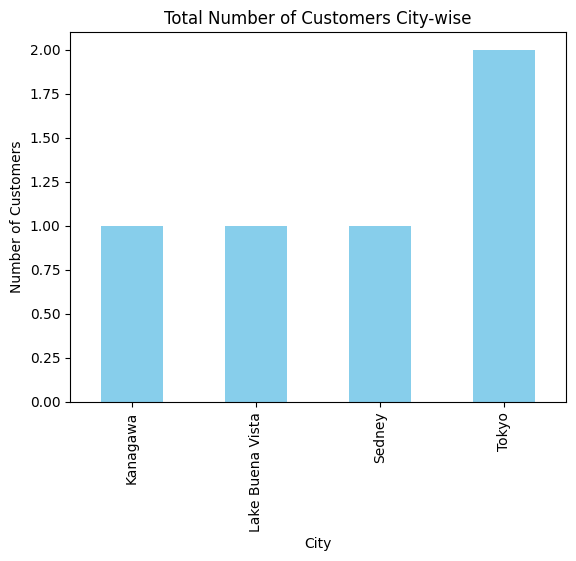

  Customer_id  quantity
2       c1006         2
0       c1004         1
1       c1005         1
3       c1008         1


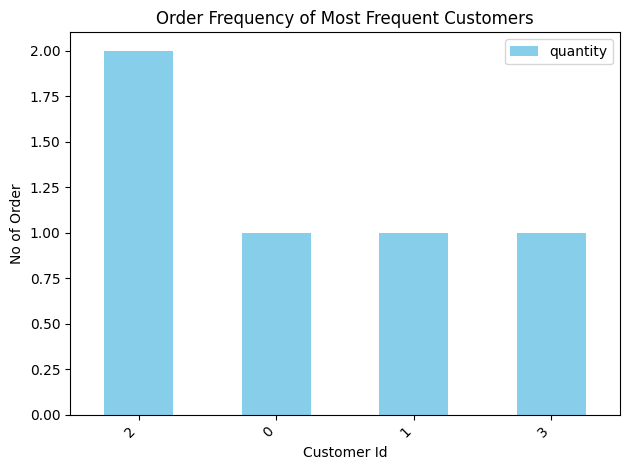

category
appliance      1
electronics    3
furniture      1
Name: product_name, dtype: int64


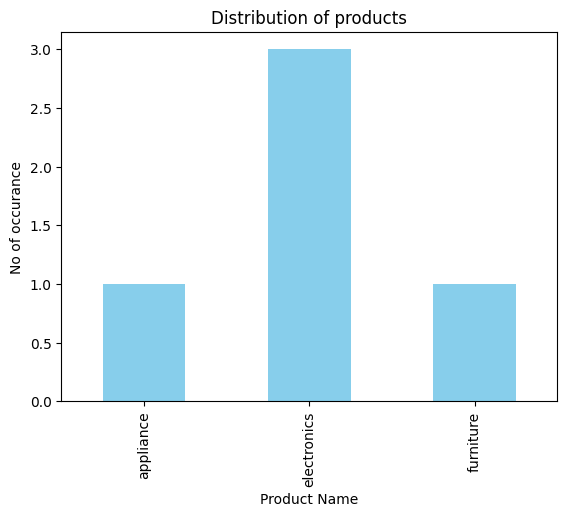

category     sub_category
appliance    electronics     1
electronics  computer        2
             phone           1
furniture    chair           1
Name: product_name, dtype: int64


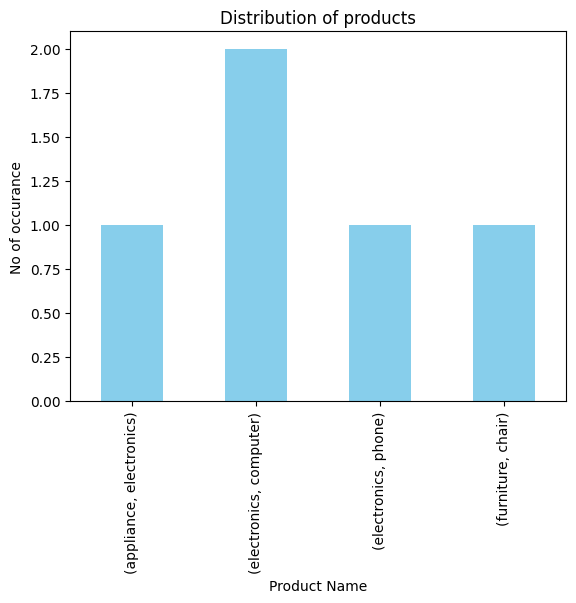

Average Selling Price: 33660.0
Maximum Selling Price: 57500
Minimum Selling Price: 800


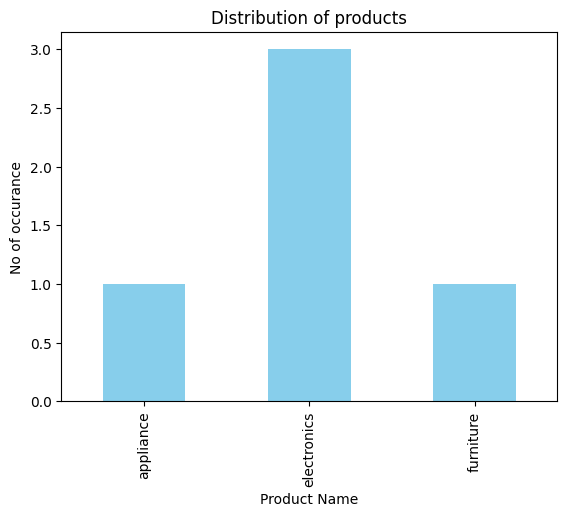

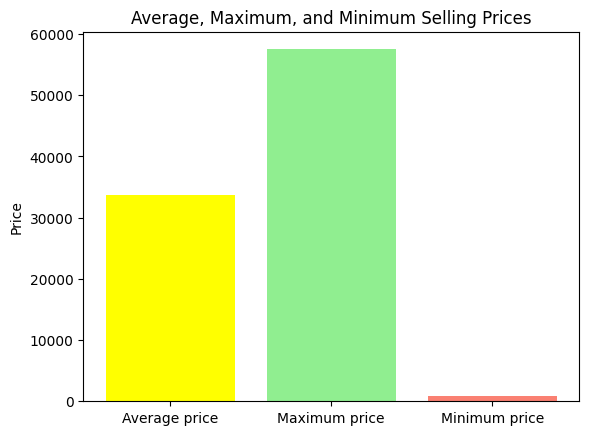

product_name
Blender        16
chair          10
smart phone     8
laptop          7
Name: quantity, dtype: int64


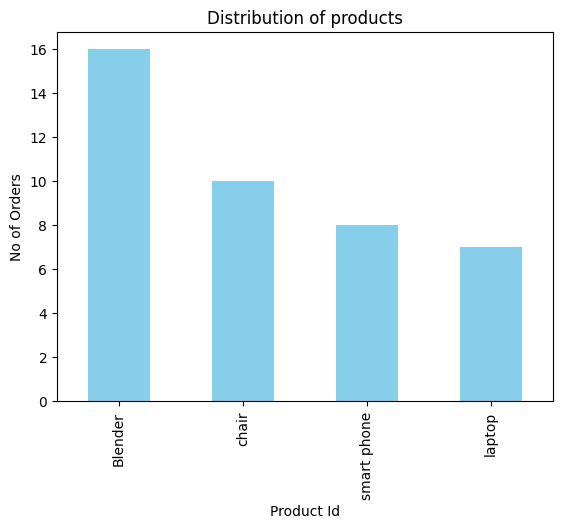

order_status
DELIVERED    3
PENDING      2
Name: count, dtype: int64


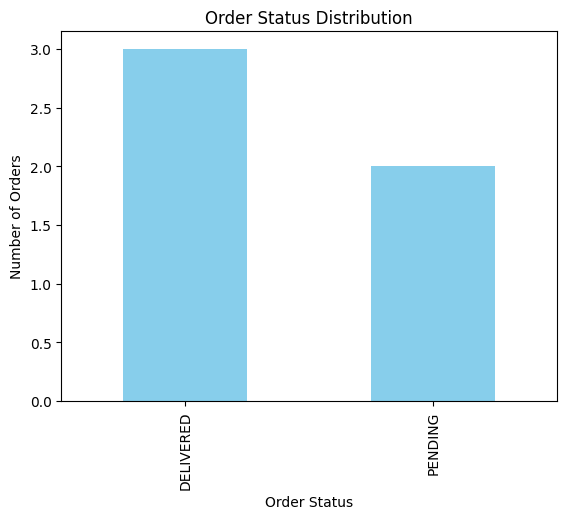

product_name
Blender        16
chair          10
smart phone     8
laptop          7
Name: quantity, dtype: int64


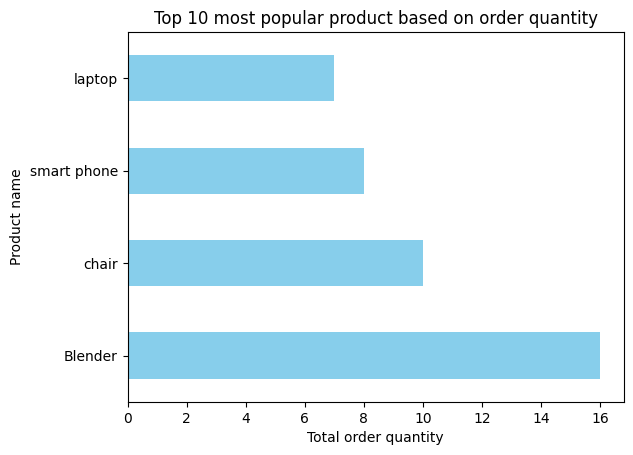

  product_name  total_price
0      Blender        12345
1        chair        76888
2       laptop        21352
3  smart phone         7954


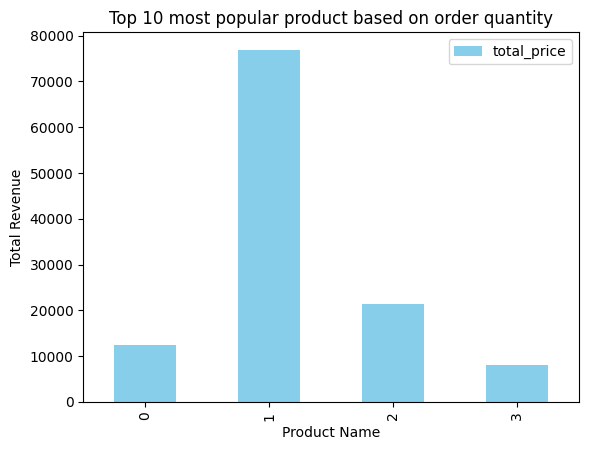

  product_name  total_price
0      Blender        12345
1        chair        76888
2       laptop        21352
3  smart phone         7954


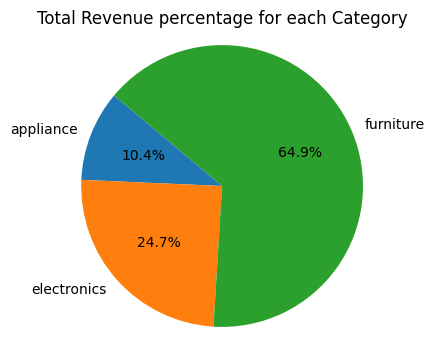

Total Revenue: 1587496
Most Profitable Products:
  product_id product_name     category sub_category  original_price  \
3       p105      Blender    appliance  electronics             900   
0       p102        chair    furniture        chair           20000   
1       p103       laptop  electronics     computer           60000   
2       p104  smart phone  electronics        phone           45000   
4       p106    Laptop HP  electronics     computer           67500   

   selling_price  stock  Profit_Margin  
3            800     10           -100  
0          15000     10          -5000  
1          55000     50          -5000  
2          40000     20          -5000  
4          57500     50         -10000  


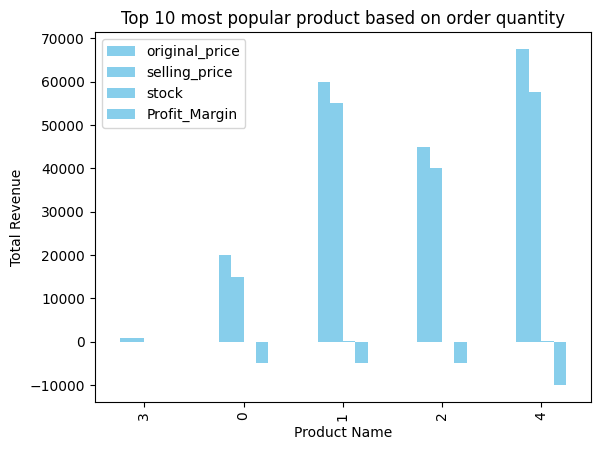

Product with the highest order quantity: p105 quantity: 16
Product with the lowest order quantity: p103 quantity: 7


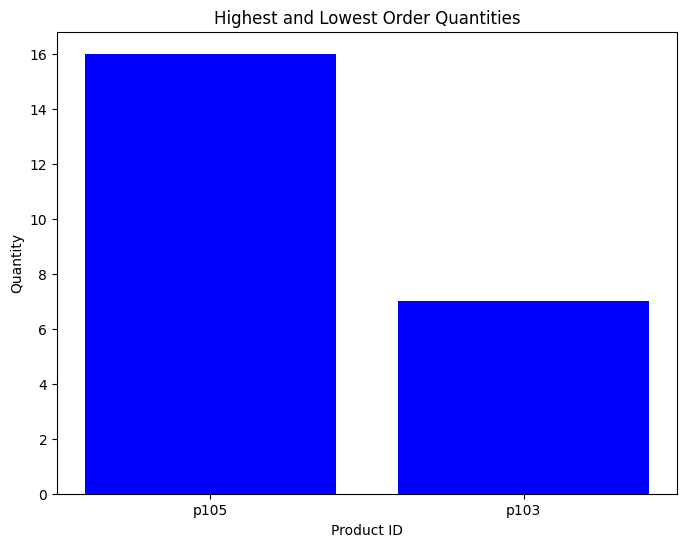

Product with the highest order quantity: Blender quantity: 16
Product with the lowest order quantity: laptop quantity: 7


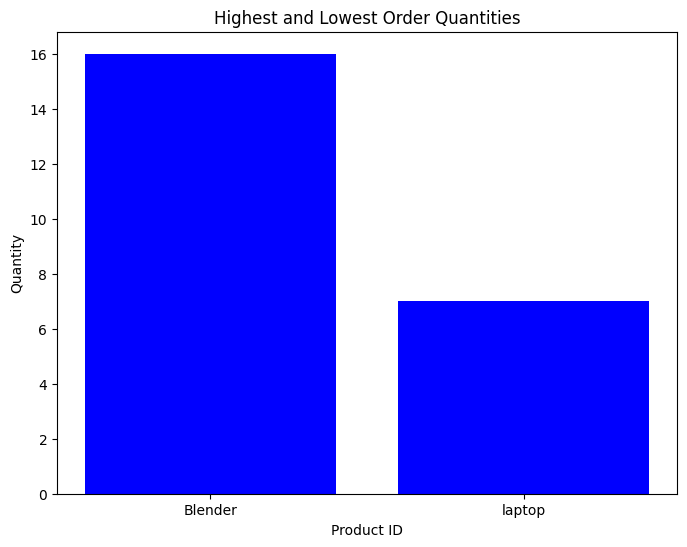

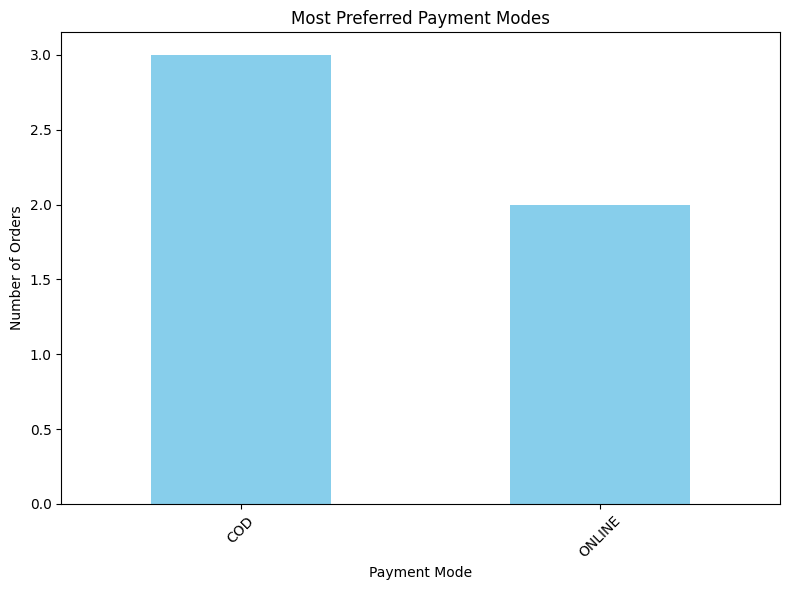

<ipython-input-50-e70ba20734c5>:321: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  order_data['order_date'] = pd.to_datetime(order_data['order_date'])


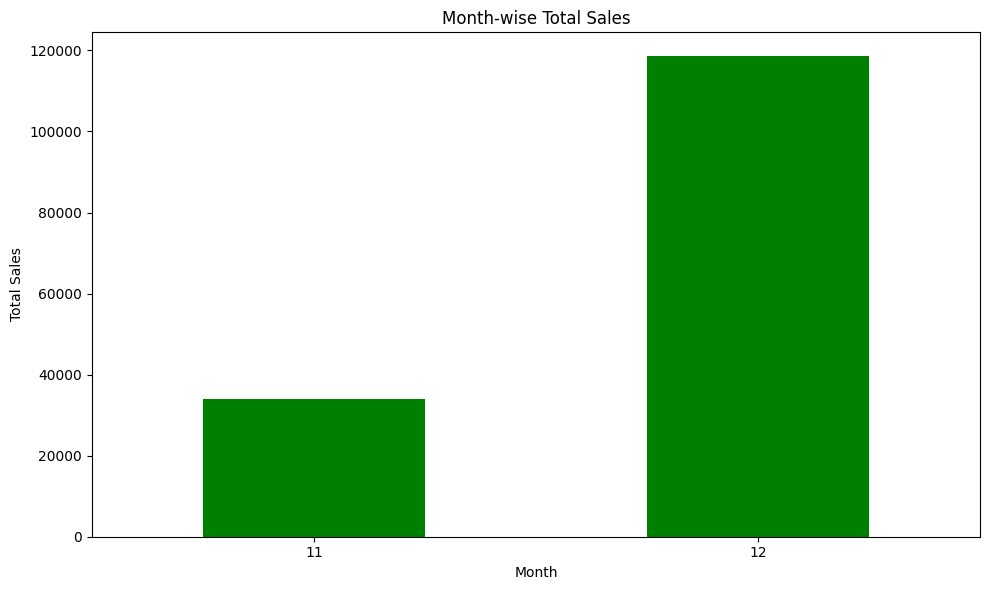

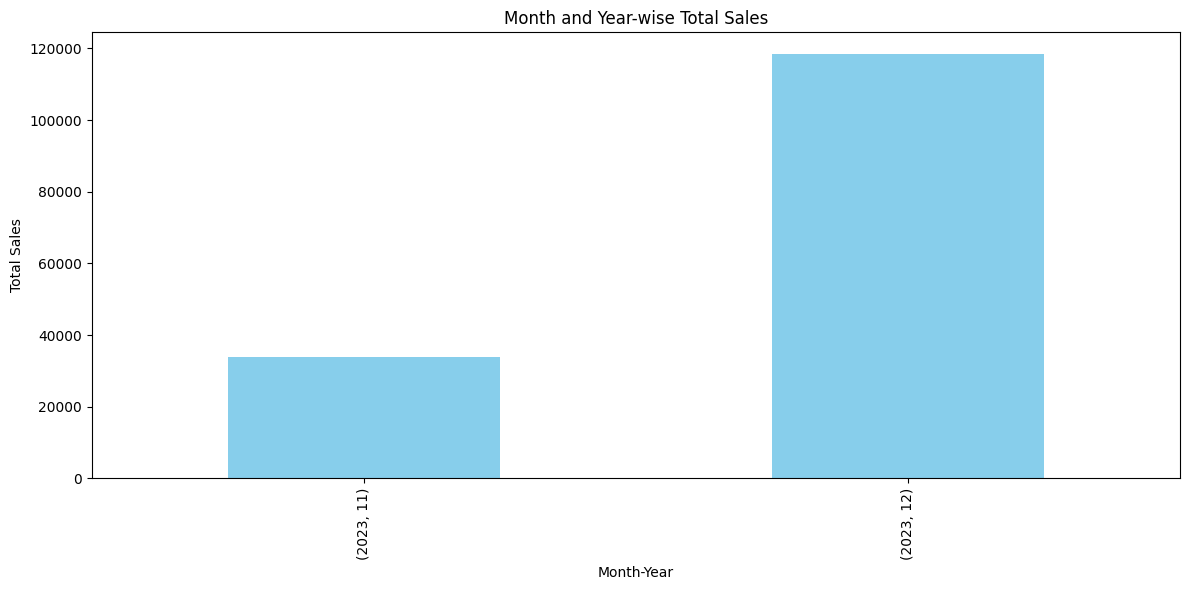

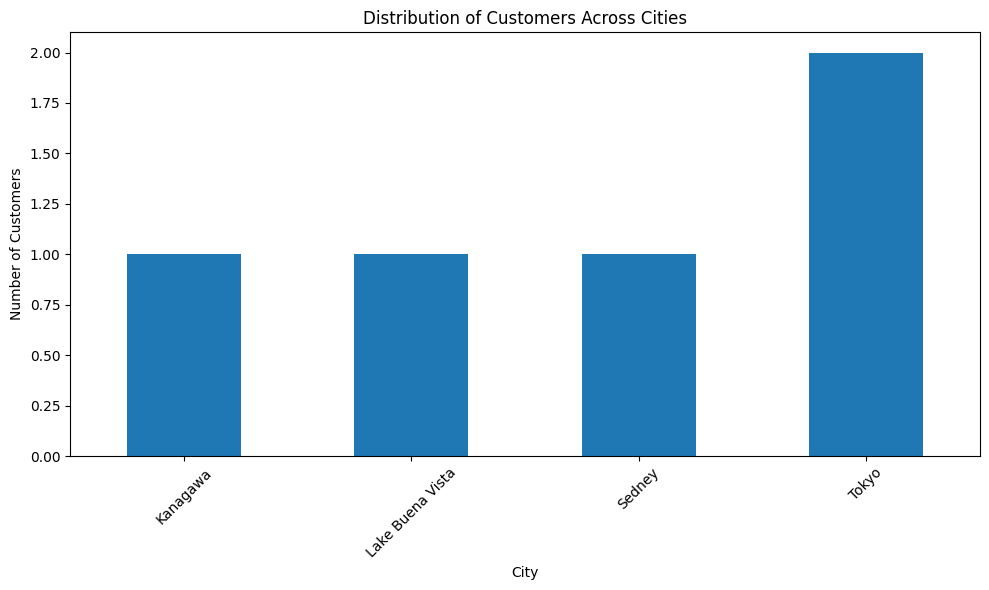

Best-Selling Products:
product_name
Blender        16
chair          10
smart phone     8
laptop          7
Name: quantity, dtype: int64


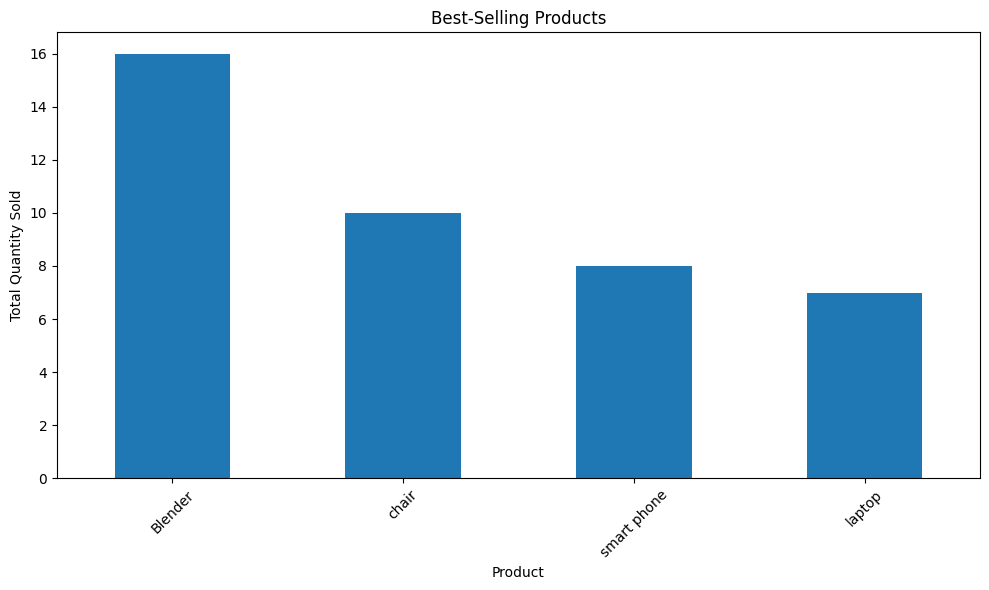

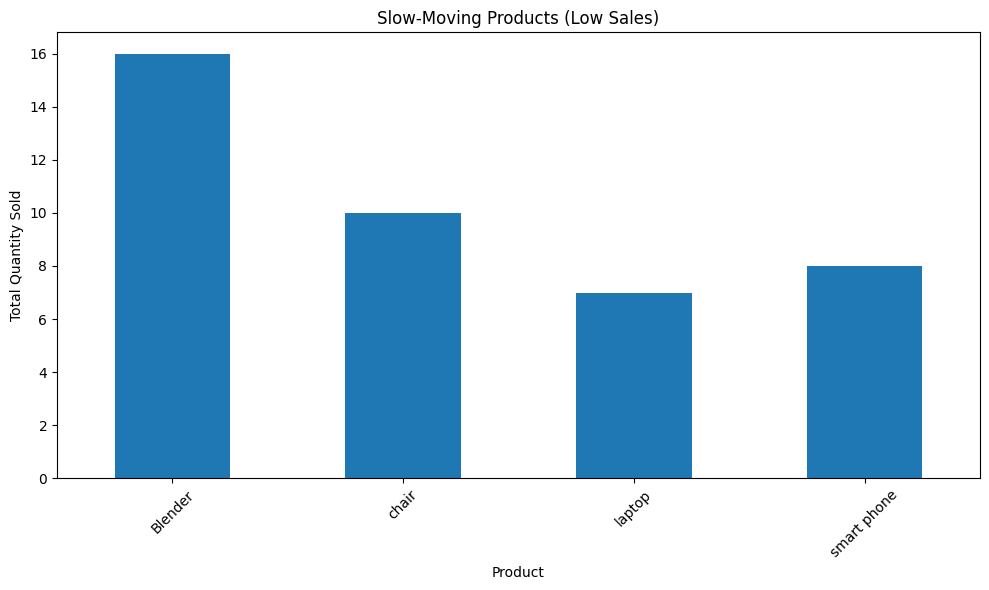

Order Counts by Payment Status:
order_status
DELIVERED    3
PENDING      2
Name: count, dtype: int64


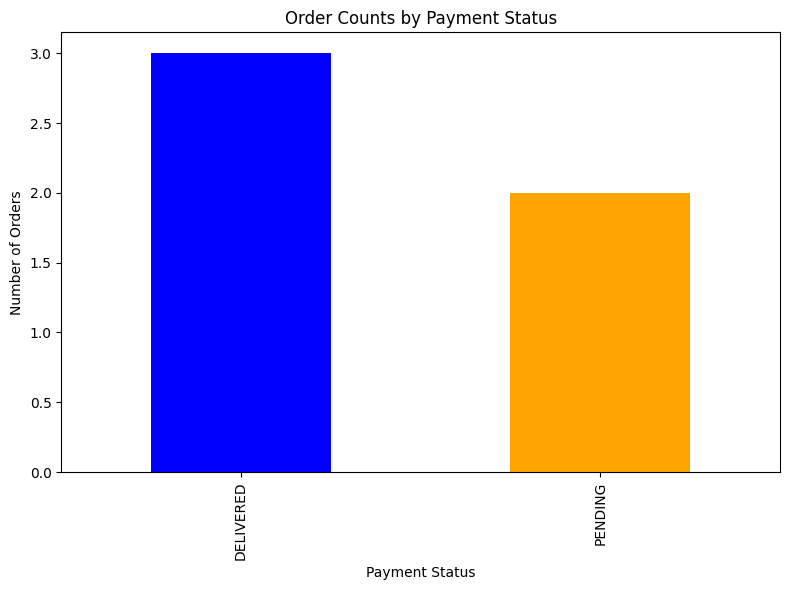

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
order_data = pd.read_csv('ORDER.csv',encoding='cp1252')
customer_data = pd.read_csv('customer.csv',encoding='cp1252')
product_data = pd.read_csv('product.csv',encoding='cp1252')


# Exploratory Data Analysis (EDA)

print(order_data.describe())
print(customer_data.describe())
print(product_data.describe())

print(order_data.head())
print(customer_data.head())
print(product_data.head())

print(order_data.isnull().sum())
print(customer_data.isnull().sum())
print(product_data.isnull().sum())

print(order_data.nunique())
print(customer_data.nunique())
print(product_data.nunique())

customer_count_by_city = customer_data.groupby('city')['name'].count()
print(customer_count_by_city)

customer_count_by_city.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Total Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

#2nd question

customer_order_frequency = order_data.groupby('customer_id')['order_date'].count().reset_index()
customer_order_frequency.columns = ['Customer_id', 'quantity']

# Sort the customers by order frequency in descending order
customer_order_frequency = customer_order_frequency.sort_values(by='quantity', ascending=False)

# Display the most frequent customers
print(customer_order_frequency)

customer_order_frequency.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Order Frequency of Most Frequent Customers')
plt.xlabel('Customer Id')
plt.ylabel('No of Order')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

#3rd Question

product_count_by_category = product_data.groupby('category')['product_name'].count()

# Print or export the results
print(product_count_by_category)

product_count_by_category.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Distribution of products')
plt.xlabel('Product Name')
plt.ylabel('No of occurance')

# Show the plot
plt.show()

 #Analyze the distribution of products across sub-categories

product_count_by_subcategory=product_data.groupby(['category','sub_category'])['product_name'].count()

# Print or export the results
print(product_count_by_subcategory)

product_count_by_subcategory.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Distribution of products')
plt.xlabel('Product Name')
plt.ylabel('No of occurance')

# Show the plot
plt.show()

#5th Question
#low_stock_products = product_data[product_data['stock'] < 'threshold']

# Print or export the low stock products
#print(low_stock_products)

average_selling_price = product_data['selling_price'].mean()

# Calculate the maximum selling price
max_selling_price = product_data['selling_price'].max()

# Calculate the minimum selling price
min_selling_price = product_data['selling_price'].min()

# Print or display the results
print("Average Selling Price:", average_selling_price)
print("Maximum Selling Price:", max_selling_price)
print("Minimum Selling Price:", min_selling_price)

product_count_by_category.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Distribution of products')
plt.xlabel('Product Name')
plt.ylabel('No of occurance')

# Show the plot
plt.show()
colors = ['yellow', 'lightgreen', 'salmon']
plt.bar(['Average price', 'Maximum price', 'Minimum price'], [average_selling_price, max_selling_price, min_selling_price], color=colors)

# Add labels and title
plt.title('Average, Maximum, and Minimum Selling Prices')

plt.ylabel('Price')

# Show the plot
plt.show()


merged_df = pd.merge(order_data, product_data, on='product_id')

product_sales = merged_df.groupby('product_name')['quantity'].sum()

# Sort the products by quantity sold in descending order and select the top 10
top_10_products = product_sales.sort_values(ascending=False).head(10)

# Print or display the top 10 products
print(top_10_products)

top_10_products.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Distribution of products')
plt.xlabel('Product Id')
plt.ylabel('No of Orders')

# Show the plot
plt.show()


order_status_distribution = order_data['order_status'].value_counts()

# Print or display the order status distribution
print(order_status_distribution)

order_status_distribution.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')

# Show the plot
plt.show()

merged_df = pd.merge(order_data, product_data, on='product_id')
product_quantity_ordered = merged_df.groupby('product_name')['quantity'].sum()

# Sort the products by quantity ordered in descending order
most_popular_products = product_quantity_ordered.sort_values(ascending=False)

# Print or display the most popular products
print(most_popular_products.head(5))

most_popular_products.plot(kind='barh', color='skyblue')

# Add labels and title
plt.title('Top 10 most popular product based on order quantity')
plt.xlabel('Total order quantity')
plt.ylabel('Product name')

# Show the plot
plt.show()

merged_df = pd.merge(order_data, product_data, on='product_id')
merged_df['Revenue'] = merged_df['quantity'] * merged_df['total_price']
revenue_by_product =merged_df.groupby('product_name')['total_price'].sum().reset_index()

# Display the result
print(revenue_by_product)

revenue_by_product.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Top 10 most popular product based on order quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')

# Show the plot
plt.show()

merged_df['Revenue'] = merged_df['quantity'] * merged_df['total_price']
merged_df = pd.merge(order_data, product_data, on='product_id')
revenue_by_category = merged_df.groupby('category')['total_price'].sum().reset_index()

# Display the result
print(revenue_by_product)

plt.figure(figsize=(4,4))
plt.pie(revenue_by_category['total_price'], labels=revenue_by_category['category'], autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue percentage for each Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

# Calculate revenue per order
order_data['Revenue'] = order_data['quantity'] * order_data['total_price']

# Calculate total revenue
total_revenue = order_data['Revenue'].sum()

# Display the total revenue
print("Total Revenue:", total_revenue)

#revenue_matrix = pd.pivot_table( total_revenue, values='Revenue', index='order_id', columns='name', aggfunc='sum', fill_value=0)

# Display the revenue matrix
#print("Revenue Matrix:")
#print(revenue_matrix)


product_data['Profit_Margin'] = (product_data['selling_price'] - product_data['original_price']) # / product_data['original_price']) * 100

# Sort products by profit margin in descending order
most_profitable_products = product_data.sort_values(by='Profit_Margin', ascending=False)

# Display the most profitable products
print("Most Profitable Products:")
print(most_profitable_products)

most_profitable_products.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Top 10 most popular product based on order quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')

# Show the plot
plt.show()

#Find product with the highest order quantity
highest_quantity_product = order_data.loc[order_data['quantity'].idxmax()]
# Find product with the lowest order quantity
lowest_quantity_product = order_data.loc[order_data['quantity'].idxmin()]

# Display the results
print("Product with the highest order quantity:", highest_quantity_product['product_id'], "quantity:", highest_quantity_product['quantity'])
print("Product with the lowest order quantity:", lowest_quantity_product['product_id'], "quantity:", lowest_quantity_product['quantity'])

product_ids = [highest_quantity_product['product_id'], lowest_quantity_product['product_id']]
quantities = [highest_quantity_product['quantity'], lowest_quantity_product['quantity']]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(product_ids, quantities, color=['blue', 'blue'])
plt.xlabel('Product ID')
plt.ylabel('Quantity')
plt.title('Highest and Lowest Order Quantities')
plt.show()


merged_df = pd.merge(order_data, product_data, on='product_id')
#Find product with the highest order quantity
highest_quantity_product = merged_df.loc[merged_df['quantity'].idxmax()]
# Find product with the lowest order quantity
lowest_quantity_product = merged_df.loc[merged_df['quantity'].idxmin()]

# Display the results
print("Product with the highest order quantity:", highest_quantity_product['product_name'], "quantity:", highest_quantity_product['quantity'])
print("Product with the lowest order quantity:", lowest_quantity_product['product_name'], "quantity:", lowest_quantity_product['quantity'])

product_names = [highest_quantity_product['product_name'], lowest_quantity_product['product_name']]
quantities = [highest_quantity_product['quantity'], lowest_quantity_product['quantity']]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(product_names, quantities, color=['blue', 'blue'])
plt.xlabel('Product ID')
plt.ylabel('Quantity')
plt.title('Highest and Lowest Order Quantities')
plt.show()


payment_mode_counts = order_data['payment_mode'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
payment_mode_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.title('Most Preferred Payment Modes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extract month from the 'date' column
order_data['month'] = order_data['order_date'].dt.month

# Group by month and sum the sales
monthly_sales = order_data.groupby('month')['total_price'].sum()

# Plotting
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='green')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Convert 'date' column to datetime if it's not already
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extract month and year from the 'date' column
order_data['year'] = order_data['order_date'].dt.year
order_data['month'] = order_data['order_date'].dt.month

# Group by year and month and sum the sales
monthly_sales = order_data.groupby(['year', 'month'])['total_price'].sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Month and Year-wise Total Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


#order_data['order_date'] = pd.to_datetime(order_data['order_date'])
#order_count_by_date = order_data['order_date'].value_counts()
## Get the date(s) with the highest number of orders
#peak_order_date = order_count_by_date.idxmax()
#
#print("Peak order date based on the highest number of orders:", peak_order_date)

# Count the number of orders for each date
#o#rder_count_by_date = order_data.groupby('order_date').size()

# Plotting
#plt.figure(figsize=(10, 6))
#plt.plot(order_count_by_date.index, order_count_by_date.values, marker='o', linestyle='-')
#
# Add labels and title
#plt.title('Number of Orders Over Time')
#plt.xlabel('Date')
#plt.ylabel('Number of Orders')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Display the plot
#plt.tight_layout()
#plt.show()

ustomer_count_by_city = customer_data['city'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
customer_count_by_city.plot(kind='bar')

# Add labels and title
plt.title('Distribution of Customers Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

#merged_df = pd.merge([order_data, product_data,customer_data], on='product_id', how='right')
# Specify the city you want to analyze
#c#ity_to_analyze = 'Tokyo'

# Filter data for the specified city
#city_data = merged_df[merged_df['city'] == city_to_analyze]

# Group data by product or category and sum the quantity
#product_popularity = merged_df.groupby('product_name')['quantity'].sum()
## Alternatively, you can group by category if you're interested in category popularity:
# category_popularity = city_data.groupby('Category')['Quantity'].sum()

# Create a box plot
#plt.figure(figsize=(10, 6))
#city_data.boxplot(column='quantity', by='product_name', figsize=(12, 8))

# Add title and labels
#plt.title(f'Distribution of Sales Quantities by Product in {city_to_analyze}')
#p#lt.xlabel('Product')
#plt.ylabel('Sales Quantity')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Display the plot
#plt.tight_layout()
#lt.show()

#category_popularity_by_city = df.groupby(['City', 'Category'])['Quantity'].sum().reset_index()

# Plotting
#plt.figure(figsize=(12, 8))
#category_popularity_by_city.boxplot(column='Quantity', by=['City', 'Category'])

# Add title and labels
#plt.title('Distribution of Sales Quantities by Category in Each City')
#p#lt.xlabel('City and Category')
#p#lt.ylabel('Sales Quantity')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Display the plot
#plt.tight_layout()
#plt.show()

#merged_df1 = pd.merge(order_data, product_data, on='product_id')
#merged_df2 = pd.merge(order_data, customer_data, on='customer_id')
#m#erged_df_these  =  pd.merge(merged_df1, merged_df2, on='order_id')
#print(merged_df)
#category_popularity_by_city = merged_df_these.groupby(['city','category'])['quantity'].sum().reset_index()
# Plotting
#plt.figure(figsize=(12, 8))
#category_popularity_by_city.boxplot(column='quantity', by=['city', 'category'])

## Add title and labels
#plt.title('Distribution of Sales Quantities by Category in Each City')
#plt.xlabel('City and Category')
#plt.ylabel('Sales Quantity')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Display the plot
#p#lt.tight_layout()
#plt.show()

merged_df = pd.merge(order_data, product_data, on='product_id')
product_sales = merged_df.groupby('product_name')['quantity'].sum()

# Identify the best-selling products
best_selling_products = product_sales.sort_values(ascending=False)

# Display the best-selling products
print("Best-Selling Products:")
print(best_selling_products)
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar')

# Add labels and title
plt.title('Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


merged_df = pd.merge(order_data, product_data, on='product_id')
product_sales = merged_df.groupby('product_name')['quantity'].sum()

# Identify slow-moving products with low sales (you can adjust the threshold as needed)
slow_moving_products = product_sales[product_sales <= 8000]


# Create a bar chart for slow-moving products
plt.figure(figsize=(10, 6))
slow_moving_products.plot(kind='bar')

# Add labels and title
plt.title('Slow-Moving Products (Low Sales)')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

order_counts = order_data['order_status'].value_counts()

# Display the counts of successful and pending payments orders
print("Order Counts by Payment Status:")
print(order_counts)
plt.figure(figsize=(8, 6))
order_counts.plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.title('Order Counts by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')

# Display the plot
plt.tight_layout()
plt.show()
